This is an input image for testing : 
 


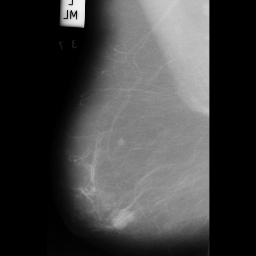

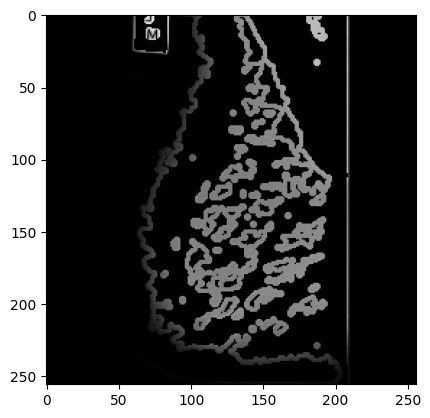

12/12 [==============================] - 5s 436ms/step
The image is benign.


In [3]:
import cv2
import numpy as np
from keras.models import load_model
from matplotlib import pyplot as plt
from PIL import Image
from google.colab.patches import cv2_imshow
%matplotlib inline

# Load the trained model
model = load_model('/content/drive/MyDrive/Major Project/breast_cancer_model (1).h5')
image_path = '/content/drive/MyDrive/Major Project/all-mias/mdb005.pgm'
input_image = cv2.imread(image_path)
# cv2_imshow(input_image)
img2 = cv2.resize(input_image, (256,256))
print("This is an input image for testing : ")
print(" ") 
cv2_imshow(img2)
print(" ")


# Convert the input image to grayscale
gray_img = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Apply a Gaussian blur with a kernel size of (3, 3) to reduce noise
blurred = cv2.GaussianBlur(gray_img, (3, 3), 0)

# Apply adaptive thresholding using the "adaptive Gaussian" method
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 45, 2)

# Apply erosion followed by dilation to remove small noise and connect broken contours
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
thresh = cv2.erode(thresh, kernel, iterations=1)
thresh = cv2.dilate(thresh, kernel, iterations=1)

# Find contours in the thresholded image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on a black image
contour_img = np.zeros(img2.shape[:2], dtype=np.uint8)
cv2.drawContours(contour_img, contours, -1, (255, 255, 255), 2)

# Display the segmented image with tumor contour
plt.imshow(cv2.bitwise_and(img2, img2, mask=contour_img), cmap='gray')
# plt.title('Segmentation of Malignant Mammogram')
plt.show()



def predict_diagnosis(image_path):
    # Load the image to predict
    img = cv2.imread(image_path, 0)
    img = cv2.resize(img, (64, 64))
    

    # Preprocess the image
    rows, cols = img.shape
    X = []
    for angle in range(360):
        M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
        img_rotated = cv2.warpAffine(img, M, (cols, rows))
        X.append(img_rotated)
    X = np.array(X)
    a, b, c = X.shape
    X = np.reshape(X, (a, b, c, 1))

    # Predict the class of the image
    y_pred = model.predict(X)
    y_pred = np.argmax(y_pred, axis=1)

    # Print the predicted class
    if np.all(y_pred == 0):
        print('The image is normal.')
    elif np.any(y_pred == 2):
        print('The image is malignant.')
    else:
        print('The image is benign.')

# Example usage
predict_diagnosis(image_path)
